# Exploration of the HybridGaze dataset 

### Checking the dataset structure and it's contents

In [ ]:
import h5py
import numpy as np
file_path = '../data/HybridGaze.h5'
with h5py.File(file_path, 'r') as f:
    # Print the keys at the root level
    print(f"Keys at root level: {list(f.keys())}")

    # Explore the 'data' group if it exists
    if 'data' in f:
        data_group = f['data']
        print("'data' is a group.")
        print(f"Keys in 'data' group: {list(data_group.keys())}")

        # Iterate through the items in the 'data' group and inspect them
        for key in data_group.keys():
            item = data_group[key]
            print(f"\nItem: {key}")
            if isinstance(item, h5py.Dataset):
                print(f"  - Shape: {item.shape}")
                print(f"  - Dtype: {item.dtype}")
                print(f"  - Sample data: {item[0:5]}")  
            elif isinstance(item, h5py.Group):
                print(f"  - Keys inside '{key}': {list(item.keys())}")
    else:
        print("'data' key not found in the file.")





Keys at root level: ['data']
'data' is a group.
Keys in 'data' group: ['gaze_x', 'gaze_y', 'is_valid', 'landmarks', 'left_eye', 'marker_x', 'marker_y', 'person_id', 'right_eye', 'source_csv', 'timestamps']

Item: gaze_x
  - Shape: (151123,)
  - Dtype: float32
  - Sample data: [404.4507  359.24585 343.32098 315.5788  292.50928]

Item: gaze_y
  - Shape: (151123,)
  - Dtype: float32
  - Sample data: [294.75867 276.78992 255.40181 238.34084 227.40074]

Item: is_valid
  - Shape: (151123,)
  - Dtype: bool
  - Sample data: [ True  True  True  True  True]

Item: landmarks
  - Shape: (151123, 478, 3)
  - Dtype: float32
  - Sample data: [[[ 0.50829726  0.5669793  -0.01864264]
  [ 0.505861    0.5264059  -0.03682867]
  [ 0.50608045  0.53730583 -0.01924777]
  ...
  [ 0.54421556  0.4393048   0.00417893]
  [ 0.5370016   0.448655    0.00417893]
  [ 0.5437943   0.4589815   0.00417893]]

 [[ 0.5087029   0.56717896 -0.01845009]
  [ 0.5060352   0.5283631  -0.03640501]
  [ 0.50631666  0.5395956  -0.0188393

### Markers visualization

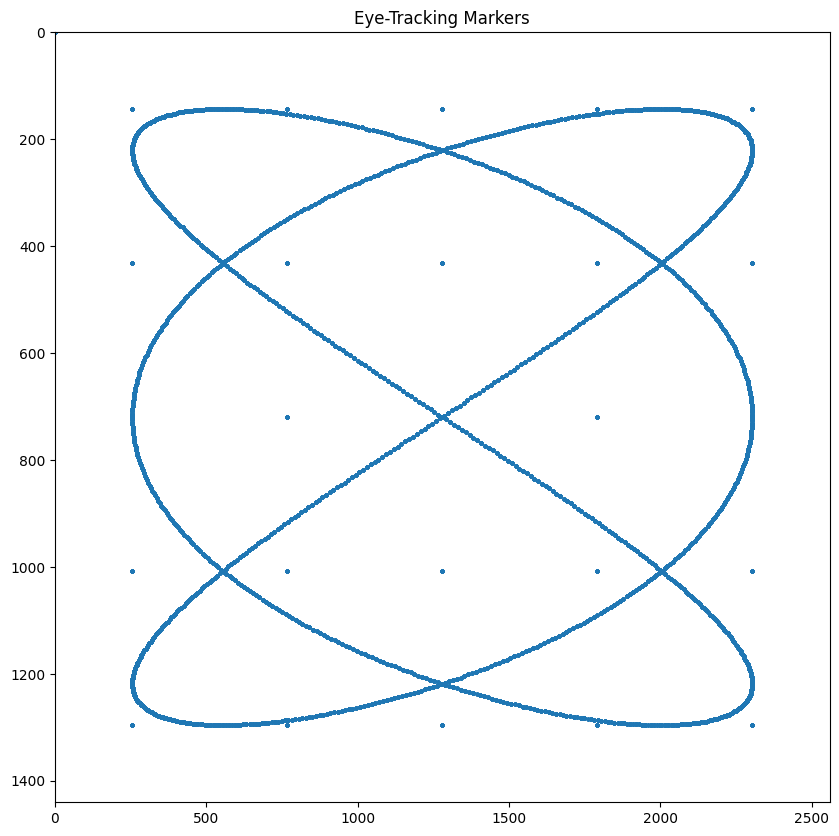

In [ ]:
# Extract the x and y markers and plot them 
import matplotlib.pyplot as plt

with h5py.File(file_path, 'r') as f:

    group = f['data']
    x_markers = group['marker_x'][:]
    y_markers = group['marker_y'][:]

    plt.figure(figsize=(10, 10))
    plt.scatter(x_markers, y_markers, s=4)
    plt.xlim(0, 2560)
    plt.ylim(0, 1440)
    plt.gca().invert_yaxis()  # y-axis to match screen coordinates
    plt.title('Eye-Tracking Markers')

### Patients' data

In [ ]:
# List unique patints IDs

with h5py.File(file_path, 'r') as f:

    group = f['data']
    patient_ids = group['person_id'][:]
    unique_patient_ids = set(patient_ids)

    for patient in unique_patient_ids:
        print(f"Unique patient ID: {patient}")

Unique patient ID: b'2025_05_27_10_57_49'
Unique patient ID: b'2025_06_07_23_06_07'
Unique patient ID: b'2025_06_08_21_30_13'
Unique patient ID: b'2025_05_29_12_45_05'
Unique patient ID: b'2025_05_27_10_34_49'
Unique patient ID: b'2025_06_02_11_40_38'
Unique patient ID: b'2025_05_27_17_20_19'
Unique patient ID: b'2025_06_02_11_09_16'
Unique patient ID: b'2025_06_07_23_41_49'
Unique patient ID: b'2025_06_07_22_33_55'
Unique patient ID: b'2025_06_02_14_51_21'
Unique patient ID: b'2025_05_24_13_01_11'
Unique patient ID: b'2025_05_27_12_49_26'
Unique patient ID: b'2025_06_04_13_37_22'
Unique patient ID: b'2025_06_02_10_10_49'


### Source.csv content


In [ ]:
with h5py.File(file_path, 'r') as f:

    group = f['data']
    csv = group['source_csv'][:]
    unique_csv = set(csv)

    for x in unique_csv:
        print(f"Unique CSV entry: {x}")
    
    # get 3x3 and 5x5 data
    csv_3x3 = [x for x in csv if b'3x3' in x]
    csv_5x5 = [x for x in csv if b'5x5' in x]

with h5py.File(file_path, 'r') as f:
    src = np.array([x.decode('utf-8') for x in f['data']['source_csv'][:]])

    mask_3x3 = src == 'data_3x3.csv'
    mask_5x5 = src == 'data_5x5.csv'
    mask_smooth = src == 'data_smooth.csv'

    print("3x3 samples:", np.sum(mask_3x3))
    print("5x5 samples:", np.sum(mask_5x5))
    print("Smooth samples:", np.sum(mask_smooth))

Unique CSV entry: b'data_video1.csv'
Unique CSV entry: b'data_3x3.csv'
Unique CSV entry: b'data_5x5.csv'
Unique CSV entry: b'data_smooth.csv'
Unique CSV entry: b'data_video2.csv'
3x3 samples: 13495
5x5 samples: 18750
Smooth samples: 13989


The masks above can be used to extract data regarding specific experiment

### Exploring "Grand Truth" data from Tobii eye tracker

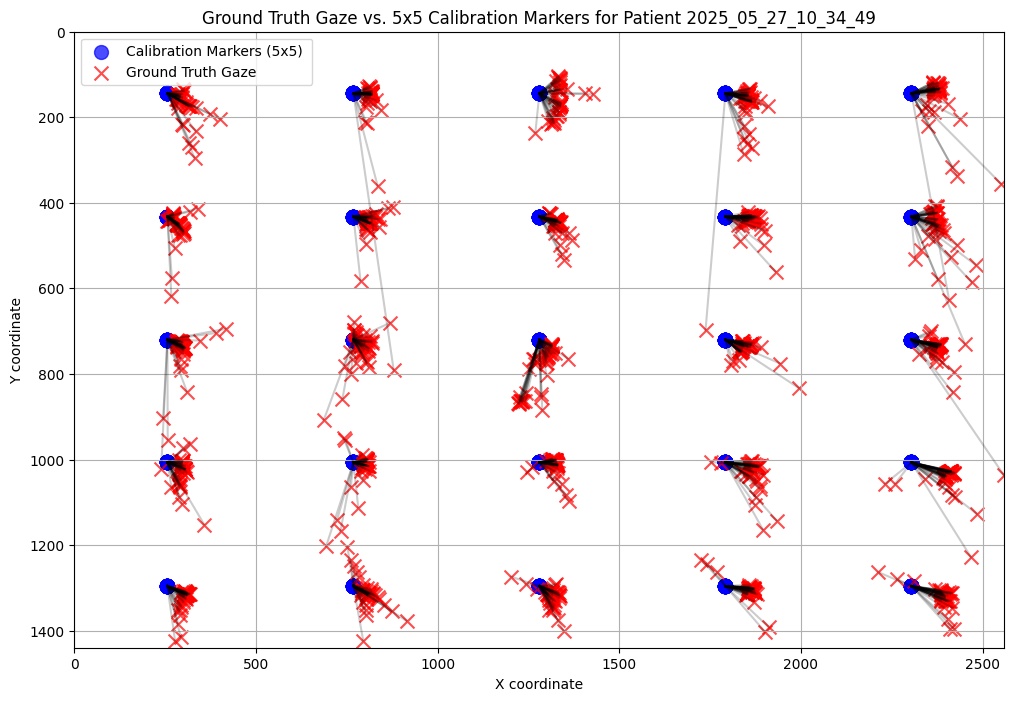

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

file_path = '../data/HybridGaze.h5'

# Load all relevant arrays once
with h5py.File(file_path, 'r') as f:
    group = f['data']

    person_ids_all = np.array([
        pid.decode('utf-8') if isinstance(pid, (bytes, bytearray)) else str(pid)
        for pid in group['person_id'][:]
    ])
    source_csv_all = np.array([
        x.decode('utf-8') if isinstance(x, (bytes, bytearray)) else str(x)
        for x in group['source_csv'][:]
    ])

    marker_x_all = group['marker_x'][:]
    marker_y_all = group['marker_y'][:]
    gaze_x_all = group['gaze_x'][:]
    gaze_y_all = group['gaze_y'][:]
    is_valid_all = group['is_valid'][:] if 'is_valid' in group else np.ones_like(marker_x_all, dtype=bool)

screen_width = 2560
screen_height = 1440

unique_persons = np.unique(person_ids_all)

def prepare_subset(mask):
    mx = marker_x_all[mask]
    my = marker_y_all[mask]
    gx = gaze_x_all[mask]
    gy = gaze_y_all[mask]
    on_screen = (
        (gx >= 0) & (gx <= screen_width) &
        (gy >= 0) & (gy <= screen_height)
    )
    return mx[on_screen], my[on_screen], gx[on_screen], gy[on_screen]

for person in unique_persons:
    mask_person = (person_ids_all == person) & is_valid_all
    mask_3x3 = (source_csv_all == 'data_3x3.csv')
    mask_5x5 = (source_csv_all == 'data_5x5.csv')

    mask_person_3x3 = mask_person & mask_3x3
    mask_person_5x5 = mask_person & mask_5x5

    has_3x3 = np.any(mask_person_3x3)
    has_5x5 = np.any(mask_person_5x5)
    if not (has_3x3 or has_5x5):
        print(f"Skipping {person}: no 3x3 or 5x5 samples.")
        continue

    m3x, m3y, g3x, g3y = prepare_subset(mask_person_3x3) if has_3x3 else (np.array([]),)*4
    m5x, m5y, g5x, g5y = prepare_subset(mask_person_5x5) if has_5x5 else (np.array([]),)*4

    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle(f'Patient {person} - Ground Truth vs Calibration Sets', fontsize=14)

    # 3x3 subplot (left)
    ax_left = axes[0]
    if m3x.size:
        ax_left.scatter(m3x, m3y, s=90, c='tab:blue', marker='o', alpha=0.7, label='Markers (3x3)')
        ax_left.scatter(g3x, g3y, s=90, c='tab:red', marker='x', alpha=0.7, label='Gaze')
        for i in range(len(m3x)):
            ax_left.plot([m3x[i], g3x[i]], [m3y[i], g3y[i]], 'k-', alpha=0.2)
    else:
        ax_left.text(0.5, 0.5, 'No 3x3 data', ha='center', va='center', fontsize=12)
    ax_left.set_title('3x3 Calibration')
    ax_left.set_xlim(0, screen_width)
    ax_left.set_ylim(0, screen_height)
    ax_left.invert_yaxis()
    ax_left.grid(True)
    ax_left.legend(loc='upper right')

    # 5x5 subplot (right)
    ax_right = axes[1]
    if m5x.size:
        ax_right.scatter(m5x, m5y, s=90, c='tab:blue', marker='o', alpha=0.7, label='Markers (5x5)')
        ax_right.scatter(g5x, g5y, s=90, c='tab:red', marker='x', alpha=0.7, label='Gaze')
        for i in range(len(m5x)):
            ax_right.plot([m5x[i], g5x[i]], [m5y[i], g5y[i]], 'k-', alpha=0.2)
    else:
        ax_right.text(0.5, 0.5, 'No 5x5 data', ha='center', va='center', fontsize=12)
    ax_right.set_title('5x5 Calibration')
    ax_right.set_xlim(0, screen_width)
    ax_right.set_ylim(0, screen_height)
    ax_right.invert_yaxis()
    ax_right.grid(True)
    ax_right.legend(loc='upper right')

    for ax in axes:
        ax.set_xlabel('X')
        ax.set_ylabel('Y')

    plt.tight_layout()
    plt.show()

# Exploring the corelation between landmarks and target point

This approach aims to check whether a reduction of input vectors based on the landmarks corelation with the target  may be justified. The goal will be to find high-impact landmarks common for all the participants  

### Data preparation for corelation analysis

In [ ]:
import pandas as pd

with h5py.File(file_path, 'r') as f:
    data_group = f['data']

    all_landmarks = data_group['landmarks'][:]
    all_marker_x = data_group['marker_x'][:]
    all_marker_y = data_group['marker_y'][:]
    all_person_ids = np.array([pid.decode('utf-8') for pid in data_group['person_id'][:]])
    all_is_valid = data_group['is_valid'][:]

valid_indices = np.where(all_is_valid)[0]
landmarks = all_landmarks[valid_indices]
y = np.stack((all_marker_x[valid_indices], all_marker_y[valid_indices]), axis=-1)
person_ids_valid = all_person_ids[valid_indices]

landmarks_xy = landmarks[:, :, :2]
num_samples = landmarks_xy.shape[0]
num_landmarks = landmarks_xy.shape[1]

landmark_features = landmarks_xy.reshape(num_samples, -1)
columns = [f'landmark_{i}_{axis}' for i in range(num_landmarks) for axis in ['x', 'y']]
df_landmarks = pd.DataFrame(landmark_features, columns=columns)

df_targets = pd.DataFrame(y, columns=['target_x', 'target_y'])
df_person = pd.DataFrame(person_ids_valid, columns=['person_id'])

# Combine into a single DataFrame
df_full = pd.concat([df_person, df_landmarks, df_targets], axis=1)

print("Full DataFrame shape:", df_full.shape)
df_full.head()

Full DataFrame shape: (139122, 959)


,person_id,landmark_0_x,landmark_0_y,landmark_1_x,landmark_1_y,landmark_2_x,landmark_2_y,landmark_3_x,landmark_3_y,landmark_4_x,...,landmark_474_x,landmark_474_y,landmark_475_x,landmark_475_y,landmark_476_x,landmark_476_y,landmark_477_x,landmark_477_y,target_x,target_y
0,2025_05_24_13_01_11,0.508297,0.566979,0.505861,0.526406,0.506080,0.537306,0.500166,0.483729,0.505767,...,0.551020,0.449573,0.544216,0.439305,0.537002,0.448655,0.543794,0.458982,256.0,144.0
1,2025_05_24_13_01_11,0.508703,0.567179,0.506035,0.528363,0.506317,0.539596,0.500327,0.485254,0.505929,...,0.550688,0.449225,0.543483,0.438380,0.535995,0.448541,0.543197,0.459445,256.0,144.0
2,2025_05_24_13_01_11,0.508715,0.566764,0.506364,0.528953,0.506503,0.540296,0.500611,0.485524,0.506282,...,0.551145,0.449270,0.544227,0.438452,0.537177,0.448595,0.544082,0.459466,256.0,144.0
3,2025_05_24_13_01_11,0.508507,0.567933,0.505853,0.528315,0.506233,0.539602,0.500257,0.485191,0.505734,...,0.550741,0.449367,0.543867,0.438720,0.536834,0.448646,0.543692,0.459361,256.0,144.0
4,2025_05_24_13_01_11,0.507707,0.566662,0.505564,0.528542,0.505932,0.539927,0.499887,0.485388,0.505439,...,0.550543,0.448471,0.543548,0.437956,0.536406,0.448134,0.543394,0.458721,256.0,144.0


### Calculating and visualizing correlations for each person

In [ ]:
""" import seaborn as sns

# Get unique person IDs
unique_persons = df_full['person_id'].unique()

# Store correlations for each person
person_correlations = {}

for person in unique_persons:
    df_person = df_full[df_full['person_id'] == person]

    corr_matrix = df_person.corr(numeric_only=True)

    corr_with_targets = corr_matrix[['target_x', 'target_y']].drop(['target_x', 'target_y'])
    
    person_correlations[person] = corr_with_targets


# Find the top 50 landmarks with the highest correlation for each person
top_n = 100
top_corr_landmarks_per_person = {}

for person, corr_df in person_correlations.items():
    max_abs_corr = corr_df[['target_x', 'target_y']].abs().max(axis=1)

    top_landmarks = max_abs_corr.nlargest(top_n)
    
    top_corr_landmarks_per_person[person] = top_landmarks.index.tolist()
    print(f"\nPerson {person} has {len(top_landmarks.index)} landmarks in their top {top_n}.")

# top common landmarks
if top_corr_landmarks_per_person:
    common_landmarks = set(list(top_corr_landmarks_per_person.values())[0])

    for person, landmarks in top_corr_landmarks_per_person.items():
        common_landmarks.intersection_update(landmarks)

    print(f"\nFound {len(common_landmarks)} common landmarks in the top {top_n} across all participants:")
    
    common_indices = sorted(list(set([int(lm.split('_')[1]) for lm in common_landmarks])))
    print(common_indices)
else:
    print("Could not determine top correlated landmarks.") """

' import seaborn as sns\n\n# Get unique person IDs\nunique_persons = df_full[\'person_id\'].unique()\n\n# Store correlations for each person\nperson_correlations = {}\n\nfor person in unique_persons:\n    df_person = df_full[df_full[\'person_id\'] == person]\n\n    corr_matrix = df_person.corr(numeric_only=True)\n\n    corr_with_targets = corr_matrix[[\'target_x\', \'target_y\']].drop([\'target_x\', \'target_y\'])\n\n    person_correlations[person] = corr_with_targets\n\n\n# Find the top 50 landmarks with the highest correlation for each person\ntop_n = 100\ntop_corr_landmarks_per_person = {}\n\nfor person, corr_df in person_correlations.items():\n    max_abs_corr = corr_df[[\'target_x\', \'target_y\']].abs().max(axis=1)\n\n    top_landmarks = max_abs_corr.nlargest(top_n)\n\n    top_corr_landmarks_per_person[person] = top_landmarks.index.tolist()\n    print(f"\nPerson {person} has {len(top_landmarks.index)} landmarks in their top {top_n}.")\n\n# top common landmarks\nif top_corr_landma

Conclusion: Data is too diverse for each users to find mutual high-impact  landmarks common for all of them. 